# Importar Librerias

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
import warnings

In [28]:
# Configuracion el notebook para visualizar mejor los datos
%matplotlib inline
sns.set(style="white", context="notebook", palette="deep")
style.use("fivethirtyeight")
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 999) # Ayuda a ver mas columnas de un dataframe

In [29]:
# Cargar CSV en DataFrame
df = pd.read_csv('data/games_sales_data.csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Filtrado de informacion para un escenario especifico

# Escenario: Validar todos los Juegos lanzados en el año 2015
df_filtro = df[df['Year_of_Release'] == 2015.0].copy()
# Escenario: Validaremos el total de ventas globales realizadas para PS4 y Xbox
df_filtro = df_filtro[df_filtro.Platform.isin(['PS4', 'XOne'])]
df_filtro.groupby('Name')['Global_Sales'].sum()

Name
Adventure Time: Finn & Jake Investigations    0.14
Arcania: Gothic 4                             0.05
Arslan: The Warriors of Legend                0.09
Assassin's Creed Chronicles: China            0.04
Assassin's Creed Syndicate                    4.69
                                              ... 
Wasteland 2                                   0.16
Wolfenstein: The Old Blood                    0.58
Yakuza Zero: The Place of Oath                0.17
Yoru no Nai Kuni                              0.08
Zombie Army Trilogy                           0.31
Name: Global_Sales, Length: 145, dtype: float64

In [31]:
# Mismo escenario pero con los valores ordenados
df_filtro = df[df['Year_of_Release'] == 2015.0].copy()
# Escenario: Validaremos el total de ventas globales realizadas para PS4 y Xbox
df_filtro = df_filtro[df_filtro.Platform.isin(['PS4', 'XOne'])]
df_filtro.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False)

Name
Call of Duty: Black Ops 3                22.02
FIFA 16                                  11.82
Star Wars Battlefront (2015)             11.64
Fallout 4                                11.38
NBA 2K16                                  6.22
                                         ...  
Blade Arcus from Shining EX               0.02
Natsuiro High School: Seishun Hakusho     0.02
Professional Farmer 2016                  0.02
Chaos;Child                               0.01
Raven's Cry                               0.01
Name: Global_Sales, Length: 145, dtype: float64

In [32]:
# Vamos a calcular el valor total de las ventas a nivel porcentual y ver como contrubuyen al 100% de las ventas
df_top = pd.DataFrame()
df_top['Sales'] = df_filtro.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False)
df_top['Sales_perct'] = 100 * df_top['Sales'] / df_top['Sales'].sum()
df_top['Sales_perct_cum'] = df_top['Sales_perct'].cumsum()
df_top.head(10)

,Sales,Sales_perct,Sales_perct_cum
Name,,,
Call of Duty: Black Ops 3,22.02,12.298241,12.298241
FIFA 16,11.82,6.601508,18.899749
Star Wars Battlefront (2015),11.64,6.500977,25.400726
Fallout 4,11.38,6.355767,31.756493
NBA 2K16,6.22,3.473890,35.230383
Madden NFL 16,5.66,3.161128,38.391511
Batman: Arkham Knight,5.44,3.038257,41.429768
The Witcher 3: Wild Hunt,5.28,2.948897,44.378665
Assassin's Creed Syndicate,4.69,2.619380,46.998045


In [33]:
df_top['top_juegos'] = np.where(df_top['Sales_perct_cum'] <= 50.0, 1, 0 )
df_top.head(11)

,Sales,Sales_perct,Sales_perct_cum,top_juegos
Name,,,,
Call of Duty: Black Ops 3,22.02,12.298241,12.298241,1
FIFA 16,11.82,6.601508,18.899749,1
Star Wars Battlefront (2015),11.64,6.500977,25.400726,1
Fallout 4,11.38,6.355767,31.756493,1
NBA 2K16,6.22,3.473890,35.230383,1
Madden NFL 16,5.66,3.161128,38.391511,1
Batman: Arkham Knight,5.44,3.038257,41.429768,1
The Witcher 3: Wild Hunt,5.28,2.948897,44.378665,1
Assassin's Creed Syndicate,4.69,2.619380,46.998045,1


In [34]:
# # Escenario
# Validar del top 10 mostrado anteriormente, 
# ¿cuánto fué la suma aportada por estos 10 juegos, versus el resto de juegos?
df_top.groupby('top_juegos')['Sales'].sum()


top_juegos
0    90.28
1    88.77
Name: Sales, dtype: float64

In [35]:
df_top.count()

Sales              145
Sales_perct        145
Sales_perct_cum    145
top_juegos         145
dtype: int64

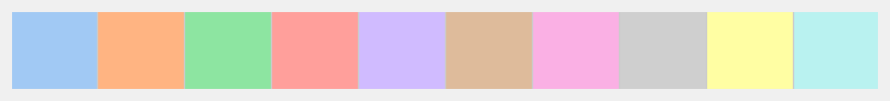

In [ ]:
current_pallete = sns.color_palette("pastel")[0:10]
sns.palplot(current_pallete)
plt.show()

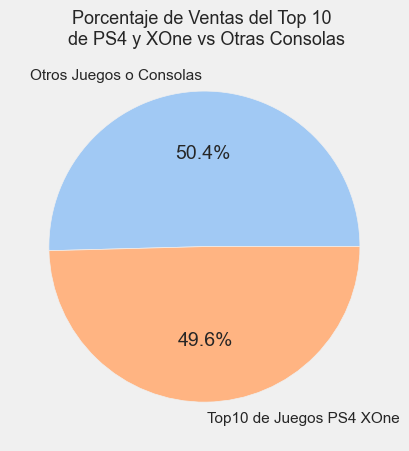

In [ ]:
# Escensario: Luego de tratar los datos, empecemos con las visualizaciones!
# Inicialización de la Figura
fig, ax = plt.subplots(1, 1)
colors = sns.color_palette("pastel")[0:10]
labels = ['Otros Juegos o Consolas', 'Top10 de Juegos PS4 XOne']

# Visualizacion Tipo Torta
ax.pie(df_top.groupby('top_juegos')['Sales'].sum(),
       labels=labels,
       colors=colors,
       autopct='%1.1f%%')

plt.title('Porcentaje de Ventas del Top 10 \n de PS4 y XOne vs Otras Consolas', fontsize=13)
plt.show()  # "explode" the 1st


In [ ]:
#Exportar a un Archivo La Visualización
fig.savefig('exportVis.jpeg', dpi=1200)